In [1]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
import glob
import json
import time
import datetime as dt
import calendar
from tqdm import tqdm
import datetime as dt
import matplotlib.pyplot as plt
import ast
import collections
from geopy.distance import geodesic
import geopandas

from shapely.geometry import Polygon
from matplotlib.patches import Polygon as PolygonPatch
from matplotlib.collections import PatchCollection
import scipy
from matplotlib.colors import LogNorm

from mpl_toolkits.basemap import Basemap
import wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [ ]:
pip install wordcloud

In [ ]:
pip install basemap

In [ ]:
pip install geopandas

In [ ]:
file_name = './Twitter_data_files/OneDrive_2_24-11-2022.zip'
with ZipFile(file_name, 'r') as zip:
    zip.printdir()
    filesname = zip.namelist()
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

In [ ]:
len(filesname)

In [ ]:
for name in filesname:
    print(name[9:20])

In [ ]:
#method 1 
twitter_data = {'tweet_id' : [],'id_str': [], 'timestamp_ms':[]}
file_name = glob.glob(r'./geoEurope_202206*')
count_file = 0
count_line = 0
count_json = 0
for name in file_name:
    count_file +=1
    with ZipFile(name,'r') as zfile:
        data = zfile.read(zfile.namelist()[0]).decode().strip().split('\n')
        for line in data:
            count_line +=1
            tmp = json.loads(line)
            count_json += 1
            if 'id' in tmp:
                twitter_data['tweet_id'].append(tmp['id'])
            if 'id_str' in tmp:
                twitter_data['id_str'].append(tmp['id_str'])
            twitter_data['timestamp_ms'].append(tmp['timestamp_ms'])
print(count_file)
print(count_line)

In [ ]:
#method 3
twitter_data = {'tweet_id' : [],'id_str': [], 'timestamp_ms':[]}
file_name = glob.glob(r'./geoEurope_202206*')
count_files = 0
count_lines = 0
count_jsons = 0
for name in file_name:
    count_files +=1
    with ZipFile(name,'r') as zfile:
        data = zfile.read(zfile.namelist()[0]).decode().strip().split('\n')
        for line in data:
            count_lines +=1
            tmp = json.loads(line)
            count_jsons += 1
           # twitter_data['tweet_id'].append(tmp.get('id',np.nan))
            twitter_data['id_str'].append(tmp.get('id_str',np.nan))
            twitter_data['timestamp_ms'].append(tmp.get('timestamp_ms',np.nan))
print(count_files)
print(count_lines)

In [ ]:
glob.glob(r'./geoEurope_202206*')

In [ ]:
data_array = []
data_dict = {}
file_name = glob.glob(r'./geoEurope_202206*')
count_files = 0
all_files = glob.glob(r'./csvdumps/data_part_*')
print(len(file_name))
print(len(all_files))
for name in tqdm(file_name):
    csvname = name[-15:-6]
    print(csvname)
    str_chk = './csvdumps\\data_part_' +csvname+'.csv'
    if str_chk in all_files:
        print(str_chk)
    else:
        print('inblock')
        print(name)
            

In [ ]:
data_array = []
data_dict = {}
file_name = glob.glob(r'./geoEurope_202206*')
count_files = 0
all_files = glob.glob(r'./csv_saved/data_part_*')
print(len(file_name))
print(len(all_files))
for name in tqdm(file_name):
    csvname = name[9:20]
    str_chk = './csvdumps\\data_part_' +csvname+'.csv'
    if str_chk in all_files:
        print('yes')
    else:
        with ZipFile(name,'r') as zfile:
            data = zfile.read(zfile.namelist()[0]).decode().strip().split('\n')
            for line in data:
                tmp = json.loads(line)
                if tmp.get('entiwhtties') and tmp['entities'].get('user_mentions'):
                    user_mention_name = [x['name'] for x in tmp['entities']['user_mentions']]
                    user_mention_scrname = [x['screen_name'] for x in tmp['entities']['user_mentions']]
                else:
                    user_mention_name = np.nan
                    user_mention_scrname = np.nan
                data_dict = {
                    'coordinate_latitude': tmp['coordinates']['coordinates'][1] 
                    if tmp.get('coordinates') and tmp['coordinates'].get('coordinates') else np.nan,
                    'coordinate_longitude': tmp['coordinates']['coordinates'][0] 
                    if tmp.get('coordinates') and tmp['coordinates'].get('coordinates') else np.nan,
                    'twit_created_datetime': dt.datetime.strptime(tmp['created_at'],'%a %b %d %H:%M:%S %z %Y') 
                    if tmp.get('created_at') else np.nan,
                    'twit_created_date': dt.datetime.strptime(tmp['created_at'],'%a %b %d %H:%M:%S %z %Y').date() 
                    if tmp.get('created_at') else np.nan,
                    'twit_created_day': calendar.day_name[dt.datetime.strptime(tmp['created_at'],'%a %b %d %H:%M:%S %z %Y').weekday()] 
                    if tmp.get('created_at') else np.nan,
                    'twit_created_hour': dt.datetime.strptime(tmp['created_at'],'%a %b %d %H:%M:%S %z %Y').hour 
                    if tmp.get('created_at') else np.nan,
                    'twit_id': tmp.get('id', np.nan),
                    'twit_text': tmp.get('text'),
                    'user_id': tmp['user'].get('id') if tmp.get('user') else np.nan,
                    'user_name': tmp['user'].get('name') if tmp.get('user') else np.nan,
                    'user_scr_name': tmp['user'].get('screen_name') if tmp.get('user') else np.nan,
                    'user_mentions_name': user_mention_name,
                    'user_mentions_scrname': user_mention_scrname,
                    'country': tmp['place'].get('country') if tmp.get('place') else np.nan,
                    'country_code': tmp['place'].get('country_code') if tmp.get('place') else np.nan,
                    'coordinate_bound': tmp['place']['bounding_box'].get('coordinates') 
                    if tmp.get('place') and tmp['place'].get('bounding_box') else np.nan   
                  }
                data_array.append(data_dict)
            df = pd.DataFrame(data_array)
            df.to_csv('csv_saved/data_part_'+csvname+'.csv',index=False)
            del df
            data_array = []
            data_dict = {}

In [ ]:
# working code required done
values_array = []
values_dictionary = {}
file_name = glob.glob(r'./geoEurope_202206*')
for i,name in enumerate(file_name):
    with ZipFile(name,'r') as zfile:
        lines = zfile.read(zfile.namelist()[0]).decode().strip().split('\n')
        for line in lines:
            val = json.loads(line)
            if val.get('entities') and val['entities'].get('user_mentions'):
                user_mention_name = [x['name'] for x in val['entities']['user_mentions']]
                user_mention_scrname = [x['screen_name'] for x in val['entities']['user_mentions']]
            else:
                user_mention_name = np.nan
                user_mention_scrname = np.nan
            values_dictionary = {
                'coordinate_latitude': val['coordinates']['coordinates'][1] 
                if val.get('coordinates') and val['coordinates'].get('coordinates') else np.nan,
                'coordinate_longitude': val['coordinates']['coordinates'][0] 
                if val.get('coordinates') and val['coordinates'].get('coordinates') else np.nan,
                'twit_created_datetime': dt.datetime.strptime(val['created_at'],'%a %b %d %H:%M:%S %z %Y') 
                if val.get('created_at') else np.nan,
                'twit_created_date': dt.datetime.strptime(val['created_at'],'%a %b %d %H:%M:%S %z %Y').date() 
                if val.get('created_at') else np.nan,
                'twit_created_day': calendar.day_name[dt.datetime.strptime(val['created_at'],'%a %b %d %H:%M:%S %z %Y').weekday()] 
                if val.get('created_at') else np.nan,
                'twit_created_hour': dt.datetime.strptime(val['created_at'],'%a %b %d %H:%M:%S %z %Y').hour 
                if val.get('created_at') else np.nan,
                'twit_id': val.get('id', np.nan),
                'twit_text': val.get('text'),
                'user_id': val['user'].get('id') if val.get('user') else np.nan,
                'user_name': val['user'].get('name') if val.get('user') else np.nan,
                'user_scr_name': val['user'].get('screen_name') if val.get('user') else np.nan,
                'user_mentions_name': user_mention_name,
                'user_mentions_scrname': user_mention_scrname,
                'country': val['place'].get('country') if val.get('place') else np.nan,
                'country_code': val['place'].get('country_code') if val.get('place') else np.nan,
                'coordinate_bound': val['place']['bounding_box'].get('coordinates') 
                if val.get('place') and val['place'].get('bounding_box') else np.nan  
              }
            values_array.append(values_dictionary)
        df = pd.DataFrame(values_array)
        df.to_csv('csv_saved/data_part_'+ str(i) +'.csv',index=False)
        del df
        values_array = []
        values_dictionary = {}

In [ ]:
for names in file

In [ ]:
file_name = glob.glob(r'./geoEurope_202206*')
len(file_name)

In [2]:
all_files = glob.glob(r'./csv_saved/data_part_*')
len(all_files)

720

In [6]:
df = pd.concat([pd.read_csv(csv_files) for csv_files in glob.glob('./csv_saved/data_part_*')], ignore_index=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15040709 entries, 0 to 15040708
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   coordinate_latitude    float64
 1   coordinate_longitude   float64
 2   twit_created_datetime  object 
 3   twit_created_date      object 
 4   twit_created_day       object 
 5   twit_created_hour      float64
 6   twit_id                float64
 7   twit_text              object 
 8   user_id                float64
 9   user_name              object 
 10  user_scr_name          object 
 11  user_mentions_name     object 
 12  user_mentions_scrname  object 
 13  country                object 
 14  country_code           object 
 15  coordinate_bound       object 
dtypes: float64(5), object(11)
memory usage: 1.8+ GB


In [9]:
# total data saved working done as one .csv
df.to_csv('csv_saved/total_data_file.csv',index=False)

In [8]:
df

coordinate_latitude  coordinate_longitude  \
0                         NaN                   NaN   
1                   52.481388                13.435   
2                         NaN                   NaN   
3                         NaN                   NaN   
4                         NaN                   NaN   
...                       ...                   ...   
15040704                  NaN                   NaN   
15040705                  NaN                   NaN   
15040706                  NaN                   NaN   
15040707                  NaN                   NaN   
15040708                  NaN                   NaN   

              twit_created_datetime twit_created_date twit_created_day  \
0         2022-05-31 23:00:00+00:00        2022-05-31          Tuesday   
1         2022-05-31 23:00:00+00:00        2022-05-31          Tuesday   
2         2022-05-31 23:00:00+00:00        2022-05-31          Tuesday   
3         2022-05-31 23:00:00+00:00        2022-05-31          Tuesday   
4         2022-05-31 23:00:01+00:00        2022-05-31          Tuesday   
...                             ...               ...              ...   
15040704  2022-06-05 02:59:51+00:00        2022-06-05           Sunday   
15040705  2022-06-05 02:59:52+00:00        2022-06-05           Sunday   
15040706  2022-06-05 02:59:56+00:00        2022-06-05           Sunday   
15040707  2022-06-05 02:59:57+00:00        2022-06-05           Sunday   
15040708  2022-06-05 02:59:58+00:00        2022-06-05           Sunday   

          twit_created_hour       twit_id  \
0                      23.0  1.531773e+18   
1                      23.0  1.531773e+18   
2                      23.0  1.531773e+18   
3                      23.0  1.531773e+18   
4                      23.0  1.531773e+18   
...                     ...           ...   
15040704                2.0  1.533282e+18   
15040705                2.0  1.533282e+18   
15040706                2.0  1.533282e+18   
15040707                2.0  1.533282e+18   
15040708                2.0  1.533282e+18   

                                                  twit_text       user_id  \
0                                   https://t.co/B3K8DCQpXg  1.276253e+08   
1                                        au weia! eens! bäm  1.092190e+09   
2                @nurse_hmsre Hayır akepe yi aya gönder mek  2.899308e+07   
3         @gigi52335676 Ci riprenderemo le colonie e anc...  8.671348e+08   
4         @rompelavabos No me consta, eso qué es? 😂😂😂 ht...  6.356244e+08   
...                                                     ...           ...   
15040704  💐💐💐💐💐💐💐💐\n💐ਵਾਹਿਗੁਰੂ ਜੀ ਕਾ ਖ਼ਾਲਸਾ💐\n💐  ਵਾਹਿਗੁਰੂ...  3.114462e+09   
15040705  https://t.co/BHtJqRwiPi Çook özledim Kabeyi😔Ra...  1.225908e+18   
15040706                            @CerCerY34 İyi gezmeler  1.126493e+18   
15040707                            https://t.co/KJwcwfdJAJ  1.505368e+18   
15040708  LGS’ye girecek olan öğrencilere başarılar dili...  1.314929e+18   

                                 user_name    user_scr_name  \
0                              valvalentin  valerievalentin   
1                      Rathausuhr Neukölln     rh_neukoelln   
2                             hasan coşkun           mosb45   
3                            il nichilista          dangobb   
4         Richi de mængo 🥭 #TeamSprigatito        MrRichi94   
...                                    ...              ...   
15040704           Nanakshahi Singh Khalsa      nanakshaahi   
15040705                           Ayşegül      aysegultyln   
15040706                  İsmail GürlekCHP      smailGrlek1   
15040707                         Fabio Fea        fabio_fea   
15040708           DATÇA CHP KADIN KOLLARI        datca_chp   

         user_mentions_name user_mentions_scrname      country country_code  \
0                       NaN                   NaN  Royaume-Uni           GB   
1                       NaN                   NaN          NaN          NaN   


In [2]:
df = pd.read_csv('csv_saved/total_data_file.csv', index_col=None, header=0)
df

coordinate_latitude  coordinate_longitude  \
0                         NaN                   NaN   
1                   52.481388                13.435   
2                         NaN                   NaN   
3                         NaN                   NaN   
4                         NaN                   NaN   
...                       ...                   ...   
15040704                  NaN                   NaN   
15040705                  NaN                   NaN   
15040706                  NaN                   NaN   
15040707                  NaN                   NaN   
15040708                  NaN                   NaN   

              twit_created_datetime twit_created_date twit_created_day  \
0         2022-05-31 23:00:00+00:00        2022-05-31          Tuesday   
1         2022-05-31 23:00:00+00:00        2022-05-31          Tuesday   
2         2022-05-31 23:00:00+00:00        2022-05-31          Tuesday   
3         2022-05-31 23:00:00+00:00        2022-05-31          Tuesday   
4         2022-05-31 23:00:01+00:00        2022-05-31          Tuesday   
...                             ...               ...              ...   
15040704  2022-06-05 02:59:51+00:00        2022-06-05           Sunday   
15040705  2022-06-05 02:59:52+00:00        2022-06-05           Sunday   
15040706  2022-06-05 02:59:56+00:00        2022-06-05           Sunday   
15040707  2022-06-05 02:59:57+00:00        2022-06-05           Sunday   
15040708  2022-06-05 02:59:58+00:00        2022-06-05           Sunday   

          twit_created_hour       twit_id  \
0                      23.0  1.531773e+18   
1                      23.0  1.531773e+18   
2                      23.0  1.531773e+18   
3                      23.0  1.531773e+18   
4                      23.0  1.531773e+18   
...                     ...           ...   
15040704                2.0  1.533282e+18   
15040705                2.0  1.533282e+18   
15040706                2.0  1.533282e+18   
15040707                2.0  1.533282e+18   
15040708                2.0  1.533282e+18   

                                                  twit_text       user_id  \
0                                   https://t.co/B3K8DCQpXg  1.276253e+08   
1                                        au weia! eens! bäm  1.092190e+09   
2                @nurse_hmsre Hayır akepe yi aya gönder mek  2.899308e+07   
3         @gigi52335676 Ci riprenderemo le colonie e anc...  8.671348e+08   
4         @rompelavabos No me consta, eso qué es? 😂😂😂 ht...  6.356244e+08   
...                                                     ...           ...   
15040704  💐💐💐💐💐💐💐💐\n💐ਵਾਹਿਗੁਰੂ ਜੀ ਕਾ ਖ਼ਾਲਸਾ💐\n💐  ਵਾਹਿਗੁਰੂ...  3.114462e+09   
15040705  https://t.co/BHtJqRwiPi Çook özledim Kabeyi😔Ra...  1.225908e+18   
15040706                            @CerCerY34 İyi gezmeler  1.126493e+18   
15040707                            https://t.co/KJwcwfdJAJ  1.505368e+18   
15040708  LGS’ye girecek olan öğrencilere başarılar dili...  1.314929e+18   

                                 user_name    user_scr_name  \
0                              valvalentin  valerievalentin   
1                      Rathausuhr Neukölln     rh_neukoelln   
2                             hasan coşkun           mosb45   
3                            il nichilista          dangobb   
4         Richi de mængo 🥭 #TeamSprigatito        MrRichi94   
...                                    ...              ...   
15040704           Nanakshahi Singh Khalsa      nanakshaahi   
15040705                           Ayşegül      aysegultyln   
15040706                  İsmail GürlekCHP      smailGrlek1   
15040707                         Fabio Fea        fabio_fea   
15040708           DATÇA CHP KADIN KOLLARI        datca_chp   

         user_mentions_name user_mentions_scrname      country country_code  \
0                       NaN                   NaN  Royaume-Uni           GB   
1                       NaN                   NaN          NaN          NaN   


In [3]:
print('The total number of tweets with duplicacies and anamolies is ', df.shape[0])

The total number of tweets with duplicacies and anamolies is  15040709


In [4]:
df.drop_duplicates(inplace = True)

In [5]:
tweet_numbs = df[(df['twit_text'].notna()) & (df['twit_created_date'] != '2022-05-31')].shape[0]
print('The number of tweets without duplicacies and anamolies is ', tweet_numbs) # 1.1 

The number of tweets without duplicacies and anamolies is  15021390


In [6]:
df = df[(df['twit_text'].notna()) & (df['twit_created_date'] != '2022-05-31')] #final data frame saved

In [7]:
#clean data file saved
df.to_csv('csv_saved/clean_total_data_file.csv',index=False)

In [2]:
#get the cleaned data 
df = pd.read_csv('csv_saved/clean_total_data_file.csv', index_col=None, header=0)
df

coordinate_latitude  coordinate_longitude  \
0                   52.481388             13.435000   
1                   53.417222             -1.488056   
2                   52.532614             13.377704   
3                   52.532614             13.377704   
4                   44.497500              8.987778   
...                       ...                   ...   
15021385                  NaN                   NaN   
15021386                  NaN                   NaN   
15021387                  NaN                   NaN   
15021388                  NaN                   NaN   
15021389                  NaN                   NaN   

              twit_created_datetime twit_created_date twit_created_day  \
0         2022-06-01 00:00:00+00:00        2022-06-01        Wednesday   
1         2022-06-01 00:00:00+00:00        2022-06-01        Wednesday   
2         2022-06-01 00:00:00+00:00        2022-06-01        Wednesday   
3         2022-06-01 00:00:01+00:00        2022-06-01        Wednesday   
4         2022-06-01 00:00:01+00:00        2022-06-01        Wednesday   
...                             ...               ...              ...   
15021385  2022-06-05 02:59:51+00:00        2022-06-05           Sunday   
15021386  2022-06-05 02:59:52+00:00        2022-06-05           Sunday   
15021387  2022-06-05 02:59:56+00:00        2022-06-05           Sunday   
15021388  2022-06-05 02:59:57+00:00        2022-06-05           Sunday   
15021389  2022-06-05 02:59:58+00:00        2022-06-05           Sunday   

          twit_created_hour       twit_id  \
0                       0.0  1.531788e+18   
1                       0.0  1.531788e+18   
2                       0.0  1.531788e+18   
3                       0.0  1.531788e+18   
4                       0.0  1.531788e+18   
...                     ...           ...   
15021385                2.0  1.533282e+18   
15021386                2.0  1.533282e+18   
15021387                2.0  1.533282e+18   
15021388                2.0  1.533282e+18   
15021389                2.0  1.533282e+18   

                                                  twit_text       user_id  \
0            zweie, da jibts aber noch janz andere! bäm bäm  1.092190e+09   
1         Wind 3.0 mph NNW. Barometer 1015.1 hPa, Rising...  2.664365e+07   
2         Social Media Manager (w/m/d), #Berlin, Fokus B...  2.943082e+07   
3         Product Owner (w/m/d) Fokus eHealth, #Berlin (...  2.943082e+07   
4         02:00\nTemp. 14,5°C App. 15,4°C\nUmid. 96% \nP...  2.858864e+09   
...                                                     ...           ...   
15021385  💐💐💐💐💐💐💐💐\n💐ਵਾਹਿਗੁਰੂ ਜੀ ਕਾ ਖ਼ਾਲਸਾ💐\n💐  ਵਾਹਿਗੁਰੂ...  3.114462e+09   
15021386  https://t.co/BHtJqRwiPi Çook özledim Kabeyi😔Ra...  1.225908e+18   
15021387                            @CerCerY34 İyi gezmeler  1.126493e+18   
15021388                            https://t.co/KJwcwfdJAJ  1.505368e+18   
15021389  LGS’ye girecek olan öğrencilere başarılar dili...  1.314929e+18   

                        user_name    user_scr_name user_mentions_name  \
0             Rathausuhr Neukölln     rh_neukoelln                NaN   
1                     SheffieldWX      SheffieldWX                NaN   
2                   dasauge® Jobs     dasauge_jobs                NaN   
3                   dasauge® Jobs     dasauge_jobs                NaN   
4                  BusallettaInfo  sulsitodisimone                NaN   
...                           ...              ...                ...   
15021385  Nanakshahi Singh Khalsa      nanakshaahi                NaN   
15021386                  Ayşegül      aysegultyln                NaN   
15021387         İsmail GürlekCHP      smailGrlek1           ['Dilâ']   
15021388                Fabio Fea        fabio_fea                NaN   
15021389  DATÇA CHP KADIN KOLLARI        datca_chp                NaN   

         user_mentions_scrname         country country_code  \
0                          NaN             NaN        

In [3]:
df

coordinate_latitude  coordinate_longitude  \
0                   52.481388             13.435000   
1                   53.417222             -1.488056   
2                   52.532614             13.377704   
3                   52.532614             13.377704   
4                   44.497500              8.987778   
...                       ...                   ...   
15021385                  NaN                   NaN   
15021386                  NaN                   NaN   
15021387                  NaN                   NaN   
15021388                  NaN                   NaN   
15021389                  NaN                   NaN   

              twit_created_datetime twit_created_date twit_created_day  \
0         2022-06-01 00:00:00+00:00        2022-06-01        Wednesday   
1         2022-06-01 00:00:00+00:00        2022-06-01        Wednesday   
2         2022-06-01 00:00:00+00:00        2022-06-01        Wednesday   
3         2022-06-01 00:00:01+00:00        2022-06-01        Wednesday   
4         2022-06-01 00:00:01+00:00        2022-06-01        Wednesday   
...                             ...               ...              ...   
15021385  2022-06-05 02:59:51+00:00        2022-06-05           Sunday   
15021386  2022-06-05 02:59:52+00:00        2022-06-05           Sunday   
15021387  2022-06-05 02:59:56+00:00        2022-06-05           Sunday   
15021388  2022-06-05 02:59:57+00:00        2022-06-05           Sunday   
15021389  2022-06-05 02:59:58+00:00        2022-06-05           Sunday   

          twit_created_hour       twit_id  \
0                       0.0  1.531788e+18   
1                       0.0  1.531788e+18   
2                       0.0  1.531788e+18   
3                       0.0  1.531788e+18   
4                       0.0  1.531788e+18   
...                     ...           ...   
15021385                2.0  1.533282e+18   
15021386                2.0  1.533282e+18   
15021387                2.0  1.533282e+18   
15021388                2.0  1.533282e+18   
15021389                2.0  1.533282e+18   

                                                  twit_text       user_id  \
0            zweie, da jibts aber noch janz andere! bäm bäm  1.092190e+09   
1         Wind 3.0 mph NNW. Barometer 1015.1 hPa, Rising...  2.664365e+07   
2         Social Media Manager (w/m/d), #Berlin, Fokus B...  2.943082e+07   
3         Product Owner (w/m/d) Fokus eHealth, #Berlin (...  2.943082e+07   
4         02:00\nTemp. 14,5°C App. 15,4°C\nUmid. 96% \nP...  2.858864e+09   
...                                                     ...           ...   
15021385  💐💐💐💐💐💐💐💐\n💐ਵਾਹਿਗੁਰੂ ਜੀ ਕਾ ਖ਼ਾਲਸਾ💐\n💐  ਵਾਹਿਗੁਰੂ...  3.114462e+09   
15021386  https://t.co/BHtJqRwiPi Çook özledim Kabeyi😔Ra...  1.225908e+18   
15021387                            @CerCerY34 İyi gezmeler  1.126493e+18   
15021388                            https://t.co/KJwcwfdJAJ  1.505368e+18   
15021389  LGS’ye girecek olan öğrencilere başarılar dili...  1.314929e+18   

                        user_name    user_scr_name user_mentions_name  \
0             Rathausuhr Neukölln     rh_neukoelln                NaN   
1                     SheffieldWX      SheffieldWX                NaN   
2                   dasauge® Jobs     dasauge_jobs                NaN   
3                   dasauge® Jobs     dasauge_jobs                NaN   
4                  BusallettaInfo  sulsitodisimone                NaN   
...                           ...              ...                ...   
15021385  Nanakshahi Singh Khalsa      nanakshaahi                NaN   
15021386                  Ayşegül      aysegultyln                NaN   
15021387         İsmail GürlekCHP      smailGrlek1           ['Dilâ']   
15021388                Fabio Fea        fabio_fea                NaN   
15021389  DATÇA CHP KADIN KOLLARI        datca_chp                NaN   

         user_mentions_scrname         country country_code  \
0                          NaN             NaN        

In [ ]:
#df = df.rename(columns={"coordinate_longitude":"coordinate_long"})
#df =df.rename(columns={"coordinate_latitude":"coordinate_longitude"})
#df = df.rename(columns={"coordinate_long":"coordinate_latitude"})

In [8]:
BBox = (df['coordinate_longitude'].min(),   df['coordinate_longitude'].max(),      
         df['coordinate_latitude'].min(), df['coordinate_latitude'].max())

In [9]:
BBox

(-46.22416995, 82.6167, -67.75555556, 93.02744279)

In [ ]:
date_df = df['twit_created_date'].groupby(df['twit_created_date']).count()
date_df.mean()

In [ ]:
min(date_df)

In [ ]:
df['user_id'].unique().shape

In [ ]:
max(date_df)

In [ ]:
#1.2 
fig = plt.figure(figsize = (25,7))
plt.plot(date_df.index, date_df)
plt.xticks(list(date_df.index), fontsize =12, rotation =45)
plt.xlabel('Twitter Dates', fontsize = 17)
plt.ylabel('Number of tweets', fontsize = 17)
plt.title('Number of Tweets by Day', fontsize =30)
plt.show()

In [ ]:
df.info()

In [9]:
weekend_df = df[(df['twit_created_day'] == 'Sunday') | (df['twit_created_day'] == 'Saturday')] # weekend data
weekend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4008913 entries, 43706 to 15040708
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   coordinate_latitude    float64
 1   coordinate_longitude   float64
 2   twit_created_datetime  object 
 3   twit_created_date      object 
 4   twit_created_day       object 
 5   twit_created_hour      float64
 6   twit_id                float64
 7   twit_text              object 
 8   user_id                float64
 9   user_name              object 
 10  user_scr_name          object 
 11  user_mentions_name     object 
 12  user_mentions_scrname  object 
 13  country                object 
 14  country_code           object 
 15  coordinate_bound       object 
dtypes: float64(5), object(11)
memory usage: 520.0+ MB


In [10]:
weekday_df = df[(df['twit_created_day'] != 'Sunday') & (df['twit_created_day'] != 'Saturday')] # weekday data
weekday_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11012477 entries, 12156 to 14844500
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   coordinate_latitude    float64
 1   coordinate_longitude   float64
 2   twit_created_datetime  object 
 3   twit_created_date      object 
 4   twit_created_day       object 
 5   twit_created_hour      float64
 6   twit_id                float64
 7   twit_text              object 
 8   user_id                float64
 9   user_name              object 
 10  user_scr_name          object 
 11  user_mentions_name     object 
 12  user_mentions_scrname  object 
 13  country                object 
 14  country_code           object 
 15  coordinate_bound       object 
dtypes: float64(5), object(11)
memory usage: 1.4+ GB


In [ ]:
#for i, (k, v) in enumerate(data.items()):
plt.boxplot( np.log(v), vert=False, labels=["{}".format(k)], positions=[i])
#plt.xlabel(r"log($\rho$)")
plt.tight_layout()
#plt.savefig("box.png")
#plt.close()

In [11]:
weekday_mean_df = weekday_df.groupby(['twit_created_date','twit_created_day']).agg({'twit_id':'count'})\
.groupby('twit_created_day').agg({'twit_id': 'mean'})

In [12]:
weekend_mean_df = weekend_df.groupby(['twit_created_date','twit_created_day']).agg({'twit_id':'count'})\
.groupby('twit_created_day').agg({'twit_id': 'mean'})

In [122]:
weekend_mean_df

twit_id
twit_created_day           
Saturday          498174.50
Sunday            504053.75

In [15]:
weekday_mean_df

twit_id
twit_created_day           
Friday            507613.00
Monday            485238.50
Thursday          501341.80
Tuesday           502357.25
Wednesday         504986.60

In [125]:
scipy.stats.ttest_ind(weekend_mean_df['twit_id'],
                weekday_mean_df['twit_id'])

Ttest_indResult(statistic=0.11961209489138254, pvalue=0.9094478558392419)

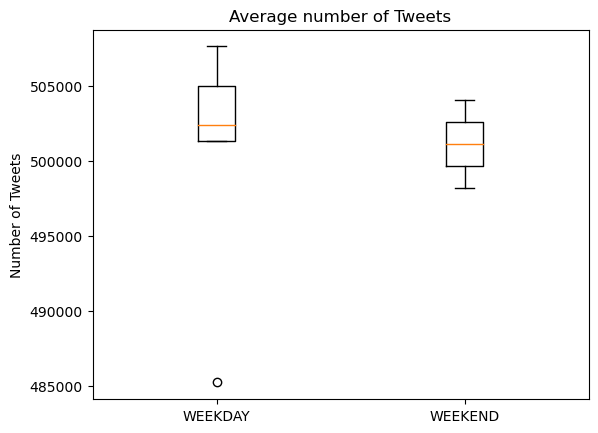

In [14]:
plt.boxplot(weekday_mean_df,labels=['WEEKDAY'], positions = [0]) # 1.3
plt.boxplot(weekend_mean_df,labels =['WEEKEND'], positions = [1])
plt.ylabel('Number of Tweets')
plt.title('Average number of Tweets')
plt.show()

In [ ]:
#weekday_df.groupby('twit_created_day').agg(['count','mean'])
#not working look into this

In [ ]:
weekday_hr_df

In [ ]:
weekday_hr_df['twit_id'].min(axis=0)

In [ ]:
#1.4 
weekday_hr_df = weekday_df.groupby(['twit_created_hour','twit_created_day']).agg({'twit_id':'count'})\
.groupby('twit_created_hour').agg({'twit_id': 'mean'})
fig = plt.figure(figsize = (25,10))
plt.plot(weekday_hr_df.index, weekday_hr_df)
plt.scatter(weekday_hr_df.index, weekday_hr_df, c='black')
plt.xticks(list(weekday_hr_df.index), fontsize =13)
plt.xlabel('Twitter Hours', fontsize = 20)
plt.ylabel('Number of tweets', fontsize = 20)
plt.title('Number of Tweets by Hour', fontsize =30)
plt.show()

In [ ]:
weekday_hr_df

In [ ]:
val = pd.DataFrame(user_df.value_counts())

In [ ]:
df.groupby(['user_id']).agg({'twit_id':'count'}).value_counts().iloc[0]

In [115]:
val_d = df.groupby(['user_name', 'user_id']).agg({'twit_id':'count'})
val_d.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 774529 entries, ('  Helhamel@lnhamel', 1136821166.0) to ('\U0001faf6👠Mari Romero 🤎🥰', 2428927038.0)
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   twit_id  774529 non-null  int64
dtypes: int64(1)
memory usage: 22.9+ MB


In [116]:
top_five_users = val_d.sort_values(by = 'twit_id', ascending = False).head() #2.2 
top_five_users

twit_id
user_name           user_id              
uzlaşma af          1.402776e+18    13376
DailyNews 🇮🇹        1.491317e+18    12518
Christian Antolic   9.547321e+17    11619
L'hora catalana     1.384111e+09    11278
minijob-anzeigen.de 1.069584e+18     9944

In [ ]:
top_five_mentions = df.groupby(['user_id', 'user_mentions_name']).agg({'twit_id':'count'}) #2.3w
top_five_mentions

In [ ]:
top_five_mentions.sort_values(by = 'twit_id', ascending = False).head()  #2.3 

In [ ]:
mention_val = df.groupby(['user_id','user_mentions_name']).agg({'twit_id':'count'})
newww = mention_val.explode('twit_id')
print(newww)
newww2 = newww.groupby(['user_mentions_name']).agg({'twit_id':'count'})
print(newww2)
newww2.sort_values(by = 'twit_id', ascending = False).head()

In [ ]:
newww2.explode('twit_id',ignore_index=True)

In [ ]:
mention_val = df['user_mentions_name'].dropna()    #2.3 question
mention_values = []
for i in range (0,len(mention_val.index)):
    if ',' in mention_val[mention_val.index[i]]:
        tmp = mention_val[mention_val.index[i]]
        for j in range (0,len(tmp)):
            mention_values.append(tmp[j])
    else:
        mention_values.append(mention_val[mention_val.index[i]])
print(mention_values)

In [ ]:
if ',' in mention_val[mention_val.index[1]]:
    a = mention_val[mention_val.index[1]]
    b = a.split(',')
    for i in range (0, len(b)):
        print(b[i])
else:
    print(mention_val[mention_val.index[1]])

In [32]:
#4.2 a
user_mention_gb = df[(df['twit_created_date'] == '2022-06-06') & (df['country_code'] == 'GB')]['user_mentions_name'].dropna().to_list()
user_mention_gb

["['Heather Rogers🇺🇦']",
 "['David Oxtaby']",
 "['Central Johnny Depp', 'Congratulations Johnny Depp 🕊️']",
 "['ريم الفيصل']",
 "['Pewpew84', 'Lynda Thompson']",
 "['Myq (Parenthetical) Kaplan', 'Aisling Bea']",
 "['terry manners ']",
 "['Francis', 'Avery', '-Joel- 🏳️\\u200d🌈', 'Lucette']",
 "['Shannon']",
 "['Kellen (they/he) the best boy']",
 "['Alfie Hewett', 'Roland-Garros', 'Gordon Reid', 'Vodafone UK', 'Wilson Tennis', 'LTA', 'RGK Wheelchairs', 'Wheelchair Tennis (LTA)']",
 "['David the Big Stepper']",
 "['Secret Yorkshire']",
 "['Michael Benson', 'Cedric']",
 "['Glen Oglaza']",
 "['𝓚𝓲𝔀𝓲', 'blank']",
 "['Diane Cullimore 🌑 M.E.', 'Danuta Naylor', 'Dan Walker']",
 "['Benonwine']",
 "['liberty logic justice', 'Jons', 'Aldo 🌞']",
 "['Napapijri']",
 "['CJ Faison', 'Chris Baird']",
 "['Wren Kitchens']",
 "['sanusi waris', 'Oloye Akin Alabi']",
 "['Ralph Schoellhammer', 'Dr. S. Jaishankar']",
 "['Happy Platy Your Maj!', 'Joe Lycett']",
 "['Paddy Keogh']",
 "['Wato', 'The Derry Coo ✊🏾🚩🏴\

In [39]:
user_mention_gb = df[(df['twit_created_date'] == '2022-06-06') 
                     & (df['country_code'] == 'GB')]['user_mentions_name'].dropna().to_list()
user_mention_gb_values = []
for i in user_mention_gb:
    for j in ast.literal_eval(i):
        user_mention_gb_values.append(j)
pd.Series(user_mention_gb_values).value_counts().head(5) 

Boris Johnson     2236
Nadine Dorries    1129
Conservatives      514
Sky News           361
GB News            349
dtype: int64

In [34]:
user_mention_gb_values = []
for i in user_mention_gb:
    for j in ast.literal_eval(i):
        user_mention_gb_values.append(j)
pd.Series(user_mention_gb_values).value_counts().head(5) 

Boris Johnson     2236
Nadine Dorries    1129
Conservatives      514
Sky News           361
GB News            349
dtype: int64

In [35]:
user_mention_it = df[(df['twit_created_date'] == '2022-06-22') &
                     (df['country_code'] == 'IT')]['user_mentions_name'].dropna().to_list()
user_mention_it_values = []
for i in user_mention_gb:
    for j in ast.literal_eval(i):
        user_mention_it_values.append(j)
pd.Series(user_mention_it_values).value_counts().head(5) 

Ministero di Ravvedimento e Santità Italia    518
Noemi Cristofalo                              347
Mattia Cristofalo                             207
Gionathan Pireddu                             184
ChantyAndrea🇮🇹                                181
dtype: int64

In [37]:
user_mention_ie = df[(df['twit_created_date'] == '2022-06-26') & 
                     (df['country_code'] == 'IE')]['user_mentions_name'].dropna().to_list()
user_mention_ie_values = []
for i in user_mention_ie:
    for j in ast.literal_eval(i):
        user_mention_ie_values.append(j)
pd.Series(user_mention_ie_values).value_counts().head(5) 

Liam Gallagher        52
Brandon Lewis         41
Padraig Harrington    41
Luis Escobar          39
Voice Of Insane       36
dtype: int64

https://www.itv.com/news/2022-06-06/tory-infighting-as-dorries-blames-inadequate-covid-planning-on-jeremy-hunt

In [20]:
mention_val = df[df['user_mentions_name'].notna()]['user_mentions_name'].to_list()   #2.3 
mentions_values = []
for i in mention_val:
    for j in ast.literal_eval(i):
        mentions_values.append(j)

In [21]:
pd.Series(mentions_values).value_counts().head(5)     #2.3 

YouTube                 20681
Recep Tayyip Erdoğan    17962
Boris Johnson           16119
Elon Musk               10572
GB News                  7892
dtype: int64

In [ ]:
#country_code
df['country_code'].dropna()

In [ ]:
country_df = df.groupby(['user_mentions_name', 'country_code', 'user_id']).agg({'twit_id':'count'})
country_df


In [ ]:
df_country = country_df.index.get_level_values('country_code')

In [ ]:
countries_df = df[['user_id', 'country_code']]   #2.4 part
countries_df

In [ ]:
countries_list = ['GB', 'IT', 'TR', 'FR']
countries_df = df[['user_id', 'country_code']]   #2.4 part
selected_countries_data = countries_df.loc[countries_df['country_code'].isin(countries_list)] # SELECTED COUNTRIES DATA
slected_countries_data = selected_countries_data.dropna()
selected_countries_data = selected_countries_data.set_index('user_id').to_dict()['country_code']

In [ ]:
selected_countries_data[516526434.0]

In [ ]:
country_mentions_df = df[['user_mentions_name', 'country_code']].dropna()
country_mentions_df

In [ ]:
sel_country_mentions_df = country_mentions_df.loc[country_mentions_df['country_code'].isin(countries_list)] # SELECTED COUNTRIES DATA
sel_country_mentions_df.dropna()

In [ ]:
user_mention_array = []    #mention id and data retrival
file_name = glob.glob(r'./geoEurope_202206*')
for i,name in enumerate(file_name):
    with ZipFile(name,'r') as zfile:
        lines = zfile.read(zfile.namelist()[0]).decode().strip().split('\n')
        for line in lines:
            val = json.loads(line)
            if val.get('entities') and val['entities'].get('user_mentions'):
                user_mention_id = [x['id'] for x in val['entities']['user_mentions']]
            else:
                user_mention_id = np.nan
            values_dictionary = {
                'user_mention_id': user_mention_id,
                'twit_id': val.get('id', np.nan),
                'country_code': val['place'].get('country_code') if val.get('place') else np.nan
            }
            user_mention_array.append(values_dictionary)
user_mention_df = pd.DataFrame(user_mention_array)
user_mention_df

In [ ]:
user_mention_df.to_csv('mention_data_part.csv',index=False)

In [ ]:
user_mention_df = pd.read_csv('mention_data_part.csv', index_col=None, header=0)
user_mention_df = user_mention_df.dropna()
user_mention_df.info()

In [ ]:
user_mention_dict = user_mention_df.set_index('twit_id').to_dict()['user_mention_id']
user_mention_dict

In [ ]:
merged_df = pd.merge(selected_countries_df ,user_mention_dict,on = "twit_id")
merged_df

In [ ]:
countries_mapping_df = pd.DataFrame(np.zeros((4,4)),columns=countries_list, index= countries_list)   #2.4 done working
for country in countries_list:
    try_val = user_mention_df[user_mention_df['country_code'] == country]['user_mention_id'].to_list()
    for a in try_val:
        for b in eval(a):
            if b in selected_countries_data:
                countries_mapping_df.loc[country][selected_countries_data[b]] +=1

In [ ]:
countries_mapping_df         #2.4

In [ ]:
countries_mapping_df  #idk answer

In [ ]:
selected_countries_df[selected_countries_df['user_id'] == selected_countries_df['user_id'].iloc[0]].iloc[0]

In [ ]:
selected_countries_df['user_id'].iloc[0]

In [ ]:
valll = []
m = user_mention_df[user_mention_df['country_code'] == 'GB']['user_mention_id'].to_list()
for i in m:
    for j in eval(i):
        valll.append(j)

In [ ]:
countries_mapping_df = pd.DataFrame(np.zeros((4,4)),columns=countries_list, index= countries_list)   #2.4 need to check
for country in ['GB']:
    for val in user_mention_df['user_mention_id'].head(10):
#         print(val)
        for i in eval(val):
            print(i)
            if i in selected_countries_df['user_id'].head(10):
                countries_mapping_df[country][i] +=1
countries_mapping_df

In [ ]:
user_mention_df['user_mention_id'].head(10)

In [ ]:
countries_mapping_df = pd.DataFrame(np.zeros((4,4)),columns=countries_list, index= countries_list)   #2.4 need to check
for country in ['GB']:
    for val in sel_country_mentions_df['user_mentions_name'].head(10):
#         print(val)
        for i in eval(val):
            print(i)
            if i in selected_countries_df['user_id'].head(10):
                countries_mapping_df[country][i] +=1
countries_mapping_df

In [ ]:
#3.4 one
nuts = geopandas.read_file(r"NUTS_RG_03M_2021_3857.geojson")
nuts

In [ ]:
luas = geopandas.read_file(r"LAU_RG_01M_2020_3857.geojson")
luas

In [ ]:
de_map = luas[luas['CNTR_CODE'].isin(['DE'])]
de_map

In [ ]:
de_map = de_map[['POP_2020','geometry']]
de_map

In [ ]:
joined = geopandas.sjoin(de_map,nuts, how='left')
joined

In [ ]:
groupped = joined['id'].groupby(by=joined['id']).count().to_frame()
groupped = groupped.rename(columns={'id':'Counts'})
groupped

In [ ]:
de_pop_map = nuts.join(groupped, on='id')
de_pop_map

In [ ]:
from matplotlib.colors import LogNorm

In [ ]:
levl3_map = de_pop_map[de_pop_map['LEVL_CODE'].isin([2,3])]  
levl3_map = levl3_map[levl3_map['CNTR_CODE'].isin(['DE'])]

levl3_map.plot("Counts", legend=True, cmap="BuPu",edgecolor='b', linewidth=0.1, norm=LogNorm(vmin=levl3_map["Counts"].min(), vmax=levl3_map["Counts"].max()))
plt.title('Population of Deutschland')
#plt.savefig("pop_of_de.png", dpi=512)
plt.show()

In [ ]:
#3.1 one
gdf = geopandas.read_file(r"NUTS_RG_03M_2021_4326.geojson")
gdf

In [ ]:
file_path = './coordinates.csv'
df1 = pd.read_csv(file_path, lineterminator='\n')

In [ ]:
point = geopandas.GeoDataFrame(df1,geometry=geopandas.points_from_xy(df1.longtitude,df.latitude)).set_crs('EPSG:4326')

In [ ]:
point = geopandas.GeoDataFrame(df1,geometry=geopandas.points_from_xy(df1.longtitude,df.latitude))

In [ ]:
point

In [ ]:
joined = geopandas.sjoin(point,gdf, how='left')
joined

In [ ]:
joined_df = pd.DataFrame(joined)
joined_df

In [ ]:
joined_df = joined_df.dropna(subset=['id'])
joined_df

In [ ]:
groupped = joined_df['id'].groupby(by=joined_df['id']).count().to_frame()
groupped

In [ ]:
groupped = groupped.rename(columns={'id':'Counts'})
groupped

In [ ]:
map_gdf = geopandas.read_file(r"NUTS_RG_03M_2021_3857.geojson")
map_gdf

In [ ]:
map_gdf = map_gdf.join(groupped, on='id')
map_gdf

In [ ]:
omr = []
with open('omr.txt','r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.rstrip()
        omr.append(line)
omr

In [ ]:
no_omr_map = map_gdf[~map_gdf['NUTS_ID'].isin(omr)]
no_omr_map

In [ ]:
map_gdf[map_gdf['NUTS_ID'].isin(omr)]

In [ ]:
levl2_map = no_omr_map[no_omr_map['LEVL_CODE'].isin([0,1])]

In [ ]:
levl2_map.plot("Counts", legend=True, cmap="Blues",edgecolor='k', linewidth=0.1, norm=LogNorm(vmin=levl2_map["Counts"].min(), vmax=levl2_map["Counts"].max()))
plt.title('Twitter Usage Across Europe')
plt.show()

In [ ]:
levl3_map = no_omr_map[no_omr_map['LEVL_CODE'].isin([0,1,2])]

levl3_map.plot("Counts", legend=True, cmap="BuPu",edgecolor='w', linewidth=0.1, norm=LogNorm(vmin=levl3_map["Counts"].min(), vmax=levl3_map["Counts"].max()))
plt.title('Twitter Usage Across Europe')
plt.savefig("twitter_in_eu_levl3.png", dpi=512)

In [ ]:
levl3_map = no_omr_map[no_omr_map['LEVL_CODE'].isin([2,3])]
levl3_map = levl3_map[levl3_map['CNTR_CODE'].isin(['UK'])]

levl3_map.plot("Counts", legend=True, cmap="BuPu",edgecolor='k', linewidth=0.1, norm=LogNorm(vmin=levl3_map["Counts"].min(), vmax=levl3_map["Counts"].max()))
plt.title('Twitter Usage Across UK')
plt.savefig("twitter_in_uk_levl3.png", dpi=512)

In [ ]:
levl3_map = no_omr_map[no_omr_map['LEVL_CODE'].isin([2,3])]
levl3_map = levl3_map[levl3_map['CNTR_CODE'].isin(['DE'])]

levl3_map.plot("Counts", legend=True, cmap="BuPu",edgecolor='k', linewidth=0.1, norm=LogNorm(vmin=levl3_map["Counts"].min(), vmax=levl3_map["Counts"].max()))
plt.title('Twitter Usage Across Germany')
plt.show()

In [ ]:
levl3_map = no_omr_map[no_omr_map['LEVL_CODE'].isin([3])]
levl3_map = levl3_map[levl3_map['CNTR_CODE'].isin(['NL'])]

levl3_map.plot("Counts", legend=True, cmap="BuPu",edgecolor='k', linewidth=0.1, norm=LogNorm(vmin=levl3_map["Counts"].min(), vmax=levl3_map["Counts"].max()))
plt.title('Twitter Usage Across Netherlands')
plt.savefig("twitter_in_nl_levl4.png", dpi=512)

In [ ]:
levl3_map = no_omr_map[no_omr_map['LEVL_CODE'].isin([3])]
levl3_map = levl3_map[levl3_map['CNTR_CODE'].isin(['ES'])]

levl3_map.plot("Counts", legend=True, cmap="BuPu",edgecolor='k', linewidth=0.1, norm=LogNorm(vmin=levl3_map["Counts"].min(), vmax=levl3_map["Counts"].max()))
plt.title('Twitter Usage Across Spain')
plt.savefig("twitter_in_es_levl4.png", dpi=512)

In [ ]:
levl3_map = no_omr_map[no_omr_map['LEVL_CODE'].isin([0])]

levl3_map.plot("Counts", legend=True, cmap="BuPu",edgecolor='k', linewidth=0.1, norm=LogNorm(vmin=levl3_map["Counts"].min(), vmax=levl3_map["Counts"].max()))
plt.title('Twitter Usage Across Spain')
plt.savefig("twitter_in_eu_by_cntr.png", dpi=512)

In [ ]:
levl3_map = no_omr_map[no_omr_map['LEVL_CODE'].isin([3])]
levl3_map = levl3_map[levl3_map['CNTR_CODE'].isin(['ES'])]

levl3_map.plot("Counts", legend=True, cmap="BuPu",edgecolor='k', linewidth=0.1, norm=LogNorm(vmin=levl3_map["Counts"].min(), vmax=levl3_map["Counts"].max()))
plt.title('Twitter Usage Across Spain')
plt.savefig("twitter_in_es_levl4.png", dpi=512)

In [ ]:
levl3_map = no_omr_map[no_omr_map['LEVL_CODE'].isin([0])]

levl3_map.plot("Counts", legend=True, cmap="BuPu",edgecolor='k', linewidth=0.1, norm=LogNorm(vmin=levl3_map["Counts"].min(), vmax=levl3_map["Counts"].max()))
plt.title('Twitter Usage Across EU')
plt.savefig("twitter_in_eu_by_cntr.png", dpi=512)

In [ ]:
#done3.1 working

In [16]:
#3.3 one
coord_bound_df = df[['coordinate_bound','twit_id','country_code']].dropna()
coord_bound_df
#coordinate_df.insert(3,'diagonal_distance','')

coordinate_bound       twit_id  \
12157     [[[-1.573648, 53.309898], [-1.573648, 53.45643...  1.531788e+18   
12158     [[[13.088304, 52.338079], [13.088304, 52.67532...  1.531788e+18   
12159     [[[13.088304, 52.338079], [13.088304, 52.67532...  1.531788e+18   
12160     [[[8.916666, 44.450843], [8.916666, 44.507773]...  1.531788e+18   
12161     [[[29.339796, 40.764835], [29.339796, 40.84733...  1.531788e+18   
...                                                     ...           ...   
15040704  [[[2.446113, 42.150116], [2.446113, 42.205611]...  1.533282e+18   
15040705  [[[28.632104, 40.802734], [28.632104, 41.23990...  1.533282e+18   
15040706  [[[34.135843, 36.678652], [34.135843, 37.19658...  1.533282e+18   
15040707  [[[12.072106, 43.281414], [12.072106, 43.61741...  1.533282e+18   
15040708  [[[28.024727, 37.012116], [28.024727, 37.48168...  1.533282e+18   

         country_code  
12157              GB  
12158              DE  
12159              DE  
12160              IT  
12161              TR  
...               ...  
15040704           ES  
15040705           TR  
15040706           TR  
15040707           IT  
15040708           TR  

[15013153 rows x 3 columns]

In [112]:
coord_df = df[['coordinate_latitude','twit_id']].dropna()
coord_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701451 entries, 12156 to 15040692
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   coordinate_latitude  701451 non-null  float64
 1   twit_id              701451 non-null  float64
dtypes: float64(2)
memory usage: 16.1 MB


In [113]:
final_coord_df = coord_bound_df[~coord_bound_df['twit_id'].isin(coord_df['twit_id'].to_list())]
final_coord_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14318088 entries, 12161 to 15040708
Data columns (total 3 columns):
 #   Column            Dtype  
---  ------            -----  
 0   coordinate_bound  object 
 1   twit_id           float64
 2   country_code      object 
dtypes: float64(1), object(2)
memory usage: 437.0+ MB


In [19]:
def bounding_distance_cal(coordinate_values):  #function 
    values = ast.literal_eval(coordinate_values)
    pt1 = (values[0][1][1], values[0][1][0])
    pt2 = (values[0][3][1], values[0][3][0])
    return geodesic(pt1,pt2).km

In [ ]:
def bounding_distance_cal(final_coord_df):  #function 
    distances = []
    for i in range (0,len(final_coord_df['coordinate_bound'])):
        values = ast.literal_eval(coordinate_df['coordinate_bound'].iloc[i])
        pt1 = (values[0][1][1], values[0][1][0])
        pt2 = (values[0][3][1], values[0][3][0])
        distances.append(geodesic(pt1,pt2).km)
    return distances

In [ ]:
final_coord_df.insert(3,'diagonal_distance','')  #values of the diagonal distance 
final_coord_df['diagonal_distance'] = bounding_distance_cal(final_coord_df)
final_coord_df

In [20]:
#final_coord_df.insert(3,'diagonal_distance','')
final_coord_df['diagonal_distance'] = final_coord_df.apply(lambda x: bounding_distance_cal(x['coordinate_bound']), axis=1)
final_coord_df

C:\Users\simra\AppData\Local\Temp\ipykernel_13776\3691848536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_coord_df['diagonal_distance'] = final_coord_df.apply(lambda x: bounding_distance_cal(x['coordinate_bound']), axis=1)


coordinate_bound       twit_id  \
12161     [[[29.339796, 40.764835], [29.339796, 40.84733...  1.531788e+18   
12169     [[[-3.889005, 40.312071], [-3.889005, 40.64351...  1.531788e+18   
12174     [[[32.411426, 37.870289], [32.411426, 38.04032...  1.531788e+18   
12176     [[[-8.684665, 37.1086], [-8.684665, 37.279918]...  1.531788e+18   
12178     [[[12.234427, 41.655874], [12.234427, 42.14095...  1.531788e+18   
...                                                     ...           ...   
15040704  [[[2.446113, 42.150116], [2.446113, 42.205611]...  1.533282e+18   
15040705  [[[28.632104, 40.802734], [28.632104, 41.23990...  1.533282e+18   
15040706  [[[34.135843, 36.678652], [34.135843, 37.19658...  1.533282e+18   
15040707  [[[12.072106, 43.281414], [12.072106, 43.61741...  1.533282e+18   
15040708  [[[28.024727, 37.012116], [28.024727, 37.48168...  1.533282e+18   

         country_code  diagonal_distance  
12161              TR          15.587739  
12169              ES          48.417594  
12174              TR          24.474516  
12176              PT          25.983218  
12178              IT          74.580003  
...               ...                ...  
15040704           ES          10.399199  
15040705           TR          79.349859  
15040706           TR          68.504722  
15040707           IT          47.501830  
15040708           TR          90.093506  

[14318088 rows x 4 columns]

In [94]:
final_coord_df.head(5)

coordinate_bound       twit_id  \
12161  [[[29.339796, 40.764835], [29.339796, 40.84733...  1.531788e+18   
12169  [[[-3.889005, 40.312071], [-3.889005, 40.64351...  1.531788e+18   
12174  [[[32.411426, 37.870289], [32.411426, 38.04032...  1.531788e+18   
12176  [[[-8.684665, 37.1086], [-8.684665, 37.279918]...  1.531788e+18   
12178  [[[12.234427, 41.655874], [12.234427, 42.14095...  1.531788e+18   

      country_code  diagonal_distance  
12161           TR          15.587739  
12169           ES          48.417594  
12174           TR          24.474516  
12176           PT          25.983218  
12178           IT          74.580003

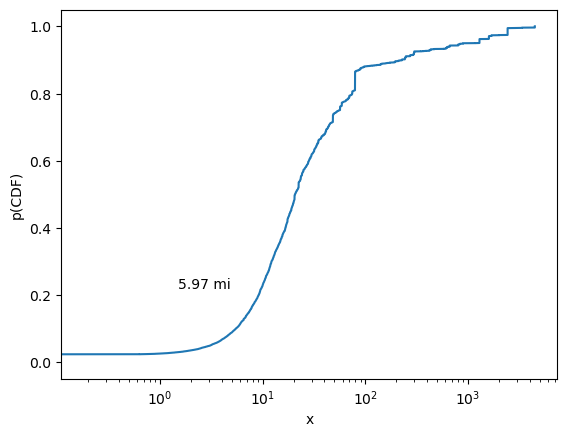

In [88]:
diagonal_data = final_coord_df['diagonal_distance']    # 3.3 done
p = 1. * np.arange(len(diagonal_data)) / (len(diagonal_data) - 1)
plt.plot(sorted(diagonal_data),p)
plt.xscale('log')
plt.xlabel('x')
#plt.plot((0,5.97),(0.2,0.2), color='b', linewidth=0.5)
plt.text(1.5, 0.22, '5.97 mi')
plt.ylabel('p(CDF)')
plt.show()

In [95]:
sort_dist = sorted(final_coord_df['diagonal_distance'])

In [102]:
sort_dist = sorted(final_coord_df['diagonal_distance'])
print(sort_dist[int(len(sort_dist)*0.2)])
print(sort_dist[int(len(sort_dist)*0.4)])
print(sort_dist[int(len(sort_dist)*0.6)])
print(sort_dist[int(len(sort_dist)*0.8)])

9.12399305415683
16.65603817712435
28.251857281414505
74.58000279969397


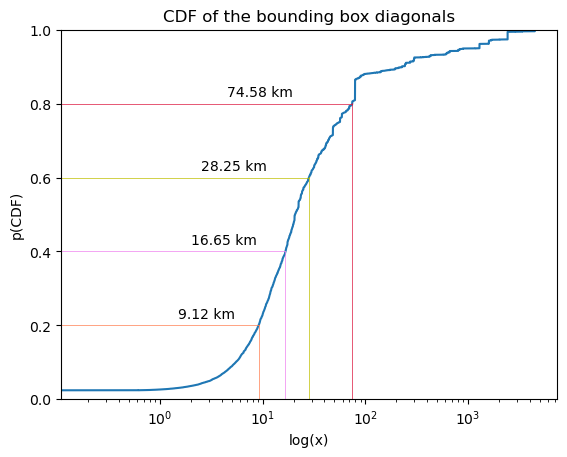

In [111]:
diagonal_data = final_coord_df['diagonal_distance']    # 3.3 done
p_value = 1. * np.arange(len(diagonal_data)) / (len(diagonal_data) - 1)
plt.plot(sorted(diagonal_data),p_value)
plt.xscale('log')
plt.xlabel('log(x)')

plt.axvline(9.12,0,0.2,color='coral', linewidth=0.5)
plt.plot((0,9.12),(0.2,0.2), color='coral', linewidth=0.5)
plt.text(1.5, 0.22, '9.12 km')

plt.axvline(16.65,0,0.4,color='violet', linewidth=0.5)
plt.plot((0,16.65),(0.4,0.4), color='violet', linewidth=0.5)
plt.text(2, 0.42, '16.65 km')

plt.axvline(28.25,0,0.6,color='y', linewidth=0.5)
plt.plot((0,28.25),(0.6,0.6), color='y', linewidth=0.5)
plt.text(2.5, 0.62, '28.25 km')

plt.axvline(74.58,0,0.8,color='crimson', linewidth=0.5)
plt.plot((0,74.58),(0.8,0.8), color='crimson', linewidth=0.5)
plt.text(4.5, 0.82, '74.58 km')

plt.ylim(0,1.001)
plt.ylabel('p(CDF)')
plt.title('CDF of the bounding box diagonals')
plt.show()

ValueError: Could not interpret value `dist` for parameter `x`

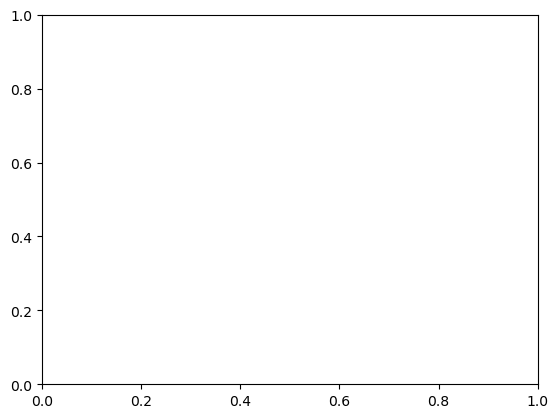

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.ecdfplot(data=diagonal_data, x='dist', log_scale=True, linewidth=2)
ax.grid(False)
ax.set_xlim(1)
sns.set_style('white')
ax.set_title('CDF of the Bounding Box Diagonals')
ax.set_xlabel('Bounding diagonal, mi')
ax.set_ylabel('CDF, $ P(X \leq x) $')
ax.axvline(5.97,0,0.2,color='b', linewidth=0.5)
ax.plot((0,5.97),(0.2,0.2), color='b', linewidth=0.5)
plt.text(1.5, 0.22, '5.97 mi')
ax.axvline(10.63,0,0.4,color='g', linewidth=0.5)
ax.plot((0,10.63),(0.4,0.4), color='g', linewidth=0.5)
plt.text(2, 0.42, '10.63 mi')
ax.axvline(17.87,0,0.6,color='y', linewidth=0.5)
ax.plot((0,17.87),(0.6,0.6), color='y', linewidth=0.5)
plt.text(2.5, 0.62, '17.87 mi')
ax.axvline(46.311,0,0.8,color='r', linewidth=0.5)
ax.plot((0,46.311),(0.8,0.8), color='r', linewidth=0.5)
plt.text(4.5, 0.82, '46.311 mi')
plt.savefig('cdf_box_diagonal.png', dpi=512)

In [ ]:
#calculate the distance   #part 1
distances = []
for i in range (0,1501315):
    values = ast.literal_eval(coordinate_df['coordinate_bound'].iloc[i])
    pt1 = (values[0][1][1], values[0][1][0])
    pt2 = (values[0][3][1], values[0][3][0])
    distances.append(geodesic(pt1,pt2).km)
print('done')

In [ ]:
for i in range (1501315,3002630): #2nd part
    values = ast.literal_eval(coordinate_df['coordinate_bound'].iloc[i])
    pt1 = (values[0][1][1], values[0][1][0])
    pt2 = (values[0][3][1], values[0][3][0])
    distances.append(geodesic(pt1,pt2).km)
print('done')

In [ ]:
for i in range (3002630,4503945): #3rd part
    values = ast.literal_eval(coordinate_df['coordinate_bound'].iloc[i])
    pt1 = (values[0][1][1], values[0][1][0])
    pt2 = (values[0][3][1], values[0][3][0])
    distances.append(geodesic(pt1,pt2).km)
print('done')

In [ ]:
distances

In [ ]:
from geopy.distance import geodesic
newport_ri = (41.49008, -71.312796)
print(type(newport_ri))
cleveland_oh = (41.499498, -81.695391)
print(geodesic(newport_ri, cleveland_oh).miles)

In [ ]:
valll = ast.literal_eval(coordinate_df['coordinate_bound'].iloc[3])
valll[0][3][0]

In [ ]:
minnn = min(valll[0])
type(minnn)

In [ ]:
from geopy.distance import geodesic
geodesic(valll[0][1],valll[0][3])

In [ ]:
#echoooo
def diag_distance(box):
    box = eval(box)
    point1 = (box[0][0][1],box[0][0][0])
    point2 = (box[0][2][1],box[0][2][0])
    return distance.geodesic(point1,point2).km

bounding_box = df2['bounding_box'].dropna()
dis = bounding_box.apply(lambda box: diag_distance(box))

p = 1. * np.arange(len(dis)) / (len(dis) - 1)
plt.plot(sorted(dis),p)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('p(CDF)')
plt.show()

In [ ]:
df_country = country_df.index.get_level_values('country_code')

In [ ]:
country_df.loc[('GB')]

In [ ]:
country_df[(country_df['country_code'] == 'GB') & (country_df['country_code'] == 'IT') & (country_df['country_code'] == 'TR') & (country_df['country_code'] == 'FR')]

In [ ]:
ment_list = np.array(mention_val.index.to_list())
ment_list

In [ ]:
ment_list.shape

In [ ]:
plt.hist(user_df, log =True)     #2.1
plt.ylabel('Log(number of users)')
plt.xlabel('Number of tweets')
plt.title('Distribution of users as per tweets')
plt.show()

In [ ]:
df['country']

In [ ]:
val = df.groupby('user_id')['user_id'].count()[df.groupby('user_id')['user_id'].count()] #2.1
val

In [ ]:
user_df = df.groupby(['user_id']).agg({'twit_id':'count'})
user_df

In [ ]:
user_df['twit_id'].mean()

In [ ]:
user_df['twit_id'].mode()

In [ ]:
np.median(user_df['twit_id'])

In [ ]:
plt.hist(user_df)
plt.show()

In [ ]:
df[(df['twit_created_day'] == 'Sunday') | (df['twit_created_day'] == 'Saturday')]

In [ ]:
df[df['twit_created_day'] == 'Saturday']

In [ ]:
df[df['twit_created_day'] == 'Sunday']

In [ ]:
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
frame

In [ ]:
len(twitter_data['tweet_id'])

In [ ]:
twitter_df = pd.DataFrame(twitter_data)
print(twitter_df)
twitter_df_data = twitter_df.drop_duplicates()

In [ ]:
twitter_df_data

In [ ]:
#method 2
start_time = time.time()
seq = [str(i).rjust(2,'0') for i in range(1,31)]
day_sum = []
for x in seq:
    num = 0
    file_add = glob.glob(r'./geoEurope_202206' + x + '*')
    for name in file_add:
        with ZipFile(name,'r') as zfile:
            data = zfile.read(zfile.namelist()[0]).decode().strip().split('\n')
            for line in data:
                num+=1
    day_sum.append(num)
end_time = time.time()
use_time = (end_time - start_time)/60
print('total time : {} min'.format(round(use_time)))
print('Daily number of tweets ', day_sum)

In [ ]:
total_tweets = np.sum(day_sum)
print('Total number of tweets :', total_tweets)

In [ ]:
file_name = glob.glob(r'./geoEurope_202206*')
file_name

In [ ]:
twitter_df_data

In [ ]:
file_name = glob.glob(r'./twitter_data_files/geoEurope_202206*')
file_name

In [ ]:
len(twitter_data['id_str'])

In [ ]:
with ZipFile.open('geoEurope_2022063022.zip') as f: 
    data = f.read()  
    d = json.loads(data.decode('utf-8'))  
    print(d)

In [ ]:
import json  
import zipfile  

d = None  
data = None  
#for i in range (0,len(filesname)):
with zipfile.ZipFile('./twitter_data_files/OneDrive_1_11-19-2022.zip', "r") as z:
    for filename in z.namelist():  
        print(filename)  
        with z.open(filename) as f: 
            data = f.read().decode('utf-8').strip().split('\n')
            d = json.loads(data)  
    

In [83]:
df[df['country'] == 'Ireland']

coordinate_latitude  coordinate_longitude  \
12167               53.030167             -9.289711   
12264                     NaN                   NaN   
12371                     NaN                   NaN   
12416                     NaN                   NaN   
12498                     NaN                   NaN   
...                       ...                   ...   
15039582                  NaN                   NaN   
15039753                  NaN                   NaN   
15039800                  NaN                   NaN   
15039845                  NaN                   NaN   
15040113                  NaN                   NaN   

              twit_created_datetime twit_created_date twit_created_day  \
12167     2022-06-01 00:00:02+00:00        2022-06-01        Wednesday   
12264     2022-06-01 00:00:31+00:00        2022-06-01        Wednesday   
12371     2022-06-01 00:01:13+00:00        2022-06-01        Wednesday   
12416     2022-06-01 00:01:32+00:00        2022-06-01        Wednesday   
12498     2022-06-01 00:02:18+00:00        2022-06-01        Wednesday   
...                             ...               ...              ...   
15039582  2022-06-05 02:37:21+00:00        2022-06-05           Sunday   
15039753  2022-06-05 02:40:55+00:00        2022-06-05           Sunday   
15039800  2022-06-05 02:42:05+00:00        2022-06-05           Sunday   
15039845  2022-06-05 02:42:52+00:00        2022-06-05           Sunday   
15040113  2022-06-05 02:48:04+00:00        2022-06-05           Sunday   

          twit_created_hour       twit_id  \
12167                   0.0  1.531788e+18   
12264                   0.0  1.531788e+18   
12371                   0.0  1.531788e+18   
12416                   0.0  1.531788e+18   
12498                   0.0  1.531788e+18   
...                     ...           ...   
15039582                2.0  1.533277e+18   
15039753                2.0  1.533278e+18   
15039800                2.0  1.533278e+18   
15039845                2.0  1.533278e+18   
15040113                2.0  1.533279e+18   

                                                  twit_text       user_id  \
12167     A female cat was lost on 18/03/2022 in Main St...  3.156787e+07   
12264                              In the film scissor hand  7.895587e+17   
12371     H*rry P*tt*r, Avatar &amp; Fast &amp; Furious ...  2.156370e+07   
12416     @benfowlkesMMA So horny for Sir Nigel Longstoc...  1.145056e+18   
12498     @eoinlettice @corkcitycouncil The council cert...  1.325838e+08   
...                                                     ...           ...   
15039582  This is kinda divisive. Man's talking about th...  1.975884e+08   
15039753                           He goes hard I can’t lie  9.281562e+07   
15039800  Sheila and I took Harry, Alex and Sarah to see...  1.698516e+08   
15039845  @HistoryMOB @Kerry_Official @OfficialWexGAA We...  1.959478e+07   
15040113          Coffee at dinner tonight was a mistake...  2.156370e+07   

                     user_name   user_scr_name  \
12167     Lost & Found Pets IE   lostfoundpets   
12264                   Amanda  Amanda77602292   
12371                 Lamhfada        Lamhfada   
12416                   Roreo_    Orby51952124   
12498             Shane Calnan      TheChizler   
...                        ...             ...   
15039582          Kieran Walsh  kieransopinion   
15039753                Watson     Watson_SLdn   
15039800     Keith O'Hourihane        KeithPFP   
15039845      Andrew Morrissey   AndrewRadioDJ   
15040113              Lamhfada        Lamhfada   

                                         user_mentions_name  \
12167                                                   NaN   
12264                                                   NaN   
12371                                                   NaN   
12416                                       ['Ben Fowlkes']   
12498     ['Dr Eoin Lettice 🇺🇦 #standwithUkraine', 'Cork...   
...            

In [60]:
#4 part #4.1 part
unusual_day_val = {}
#country_code = ['GB','FR','TR']
#BRITAIN, ITALY,GREECE
country_code = ['GB','IT','GR']   #4.1 
for country in country_code:
    unusual_day_val[country] = df[df['country_code'] == country]['twit_created_date'].groupby(df['twit_created_date']).count()

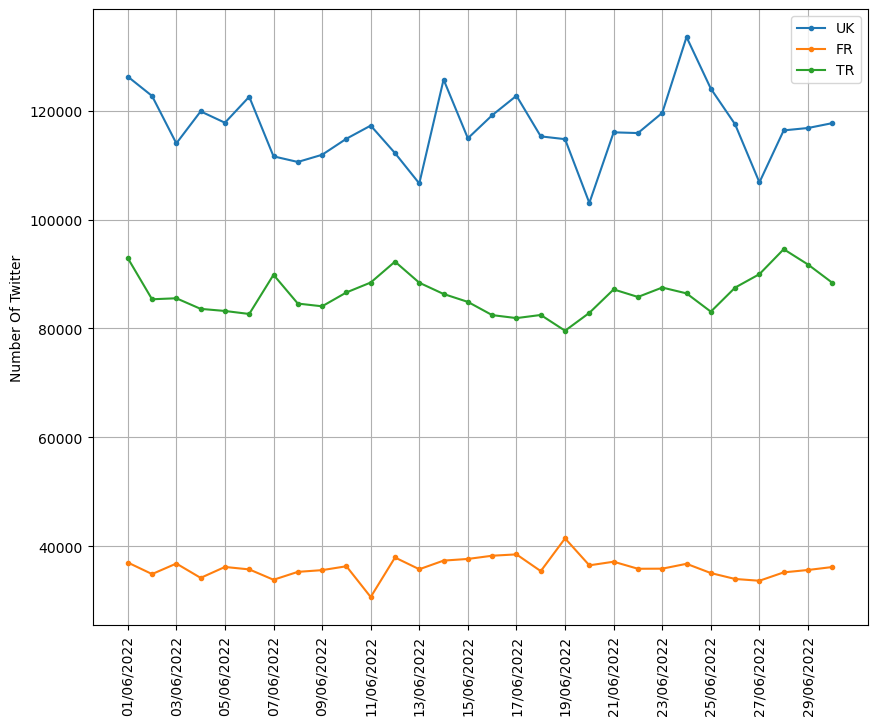

In [26]:
seq = [str(i).rjust(2,'0') for i in range(1,31)]
plt.figure(figsize=(10,8),dpi=100)
plt.plot(unusual_day['GB'],marker='o',markersize=3,label='UK')
plt.plot(unusual_day['FR'],marker='o',markersize=3,label='FR')
plt.plot(unusual_day['TR'],marker='o',markersize=3,label='TR')
plt.ylabel('Number Of Twitter')
xlabel = [i +'/06/2022' for i in seq]
plt.xticks(range(0,30,2), xlabel[::2],rotation='vertical')
plt.legend()
plt.grid()
plt.show()

In [5]:
# per person tweets day wise
unusual_day_val= {}
#BRITAIN, ITALY,IRELAND
country_code = ['GB','IT','IE']   #4.1 
for country in country_code:
    val = df[df['country_code'] == country]
    unusual_day_val[country] = val['twit_created_date'].groupby(df['twit_created_date']).count() /val['user_id'].groupby(df['twit_created_date']).nunique()

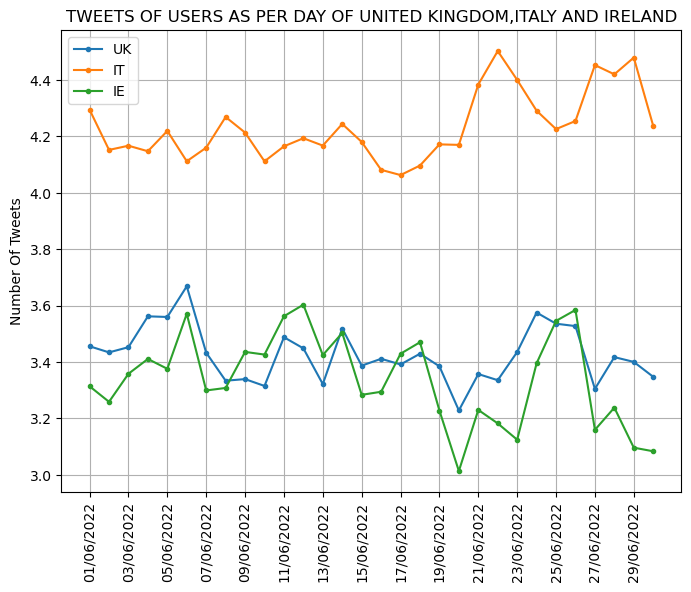

In [6]:
seq = [str(i).rjust(2,'0') for i in range(1,31)]
plt.figure(figsize=(8,6),dpi=100)
plt.plot(unusual_day_val['GB'],marker='o',markersize=3,label='UK')
plt.plot(unusual_day_val['IT'],marker='o',markersize=3,label='IT')
plt.plot(unusual_day_val['IE'],marker='o',markersize=3,label='IE') 
plt.ylabel('Number Of Tweets')
plt.title('TWEETS OF USERS AS PER DAY OF UNITED KINGDOM,ITALY AND IRELAND')
xlabel = [i +'/06/2022' for i in seq]
plt.xticks(range(0,30,2), xlabel[::2],rotation='vertical')
plt.legend()
plt.grid()
plt.show()

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
#4.2 a part
# removes words such as "and", "if", "I" etc
Stopwords = stopwords.words(fileids=['english','French','turkish','spanish'])
# add any other words you don't want in the word cloud
Stopwords.append("https")
Stopwords.append("co")
# make a wordcloud object
wordcloud = wordcloud.WordCloud(background_color='white',
                          stopwords=Stopwords,
                          max_words=200,
                          max_font_size=50,
                          random_state=42)

In [9]:
word_list = df[(df['country_code'] == 'GB') & (df['twit_created_date'] == '2022-06-06')]['twit_text'].to_list()

In [10]:
flat_list = ' '.join(word for word in word_list)

In [11]:
import wordcloud
c = wordcloud.WordCloud(background_color='white',
                          stopwords=Stopwords,
                          max_words=200,
                          max_font_size=50,
                          random_state=42)
c.generate(flat_list)

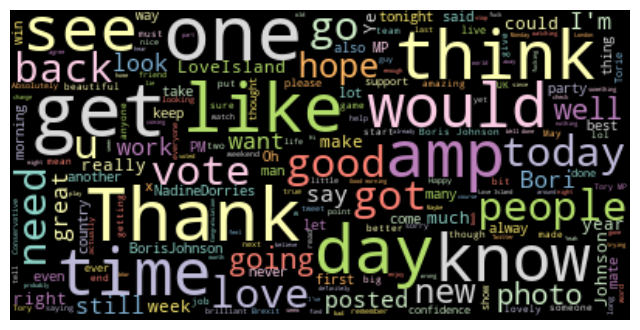

In [13]:
# UNITED KINGDOM WORD CLOUD
words_eng = df[(df['country_code'] == 'GB') & (df['twit_created_date'] == '2022-06-06')]['twit_text'].to_list()
words_list = ' '.join(word for word in words_eng)
c = wordcloud.WordCloud(background_color='black',
                        colormap='Set3',
                          stopwords=Stopwords,
                          max_words=200,
                          max_font_size=50,
                          random_state=42)
c.generate(words_list)
plt.figure(figsize=(8,6),dpi=100)
plt.imshow(c,interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
word_freq1 = WordCloud.process_text(c,words_list) 

In [19]:
freq = pd.Series(word_freq1).sort_values(ascending=False)[:10]
freq

one      3205
get      3072
Thank    2813
think    2483
like     2450
day      2362
amp      2326
know     2251
time     2250
see      2153
dtype: int64

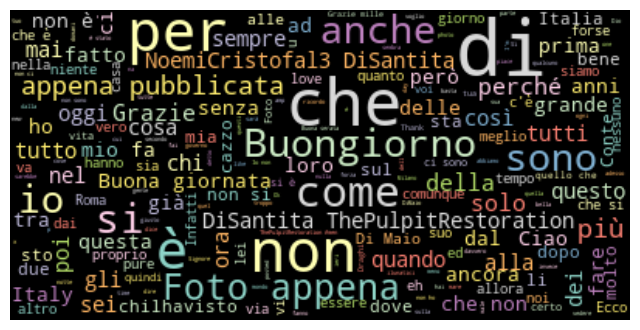

In [120]:
#ITALY WORD CLOUD
words_itl = df[(df['country_code'] == 'IT') & (df['twit_created_date'] == '2022-06-22')]['twit_text'].to_list()
words_list = ' '.join(word for word in words_itl)
c = wordcloud.WordCloud(background_color='black',
                        colormap='Set3',
                          stopwords=Stopwords,
                          max_words=200,
                          max_font_size=50,
                          random_state=42)
c.generate(words_list)
plt.figure(figsize=(8,6),dpi=100)
plt.imshow(c,interpolation='bilinear')
plt.axis('off')
plt.show()

In [121]:
words_list

'02:00\nTemp. 18,9°C App. 21,0°C\nUmid. 94% \nPioggia/Rain 0,0 mm 0,0 mmh\nVento/wind 5,0 Kmh NE F1 Max 5,0 Kmh\nPress. 1… https://t.co/wTu9a2SOpX @danieltrejo650 @GabitaBion @PLP_Ezeiza1 Yo, por lo pronto, me fui hace 7 años y no pienso regresar ni bajo amenaza de muerte... 01:48 Temp. 23.7°C, Hum. 88%, Dewp. 21.1°C, Bar. 1011.2 hpa, Rain Today 0 mm, Wind 270° 4.0 km/h 01:51 Temp. 23°C, Hum. 65%, Dewp. 14.9°C, Bar. 1010.8 hpa, Rain Today 0 mm @dariii_x3 🙏🏽🙏🏽🙏🏽 Stasera in ritardo clamoroso, ma sto male, malissimo, e qualche sera/notte, non riesco ad interagire come faccio tu… https://t.co/8awXWmvbFl مجھے جو ابھی تک سمجھ آئی ہے یہ یونیفارم والے یہ سوچ رہے ہیں کہ ان لوگوں نے یہاں آ کے اس ملک میں ایسٹ اینڈ کمپنی کھو… https://t.co/wsyMNcSCZe @Italiantifa @chetempochefa @AlekosPrete @BeppeGiulietti @PBerizzi @elio_vito Onore a un partigiano✊💓 @SoyCons_Ok @GabitaBion @PLP_Ezeiza1 Yo, no vuelvo ni de visita. \nEtapa Concluida. @sasol29 Cattivo @GianmarcoGuerr7 Spacca tutto 🤣 La semana más dif

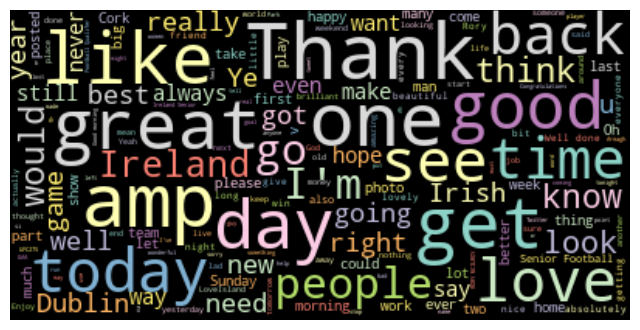

In [118]:
#IRELAND WORD CLOUD
words_grc = df[(df['country_code'] == 'IE') & (df['twit_created_date'] == '2022-06-12')]['twit_text'].to_list()
words_list = ' '.join(word for word in words_grc)
c = wordcloud.WordCloud(background_color='black',
                        colormap='Set3',
                          stopwords=Stopwords,
                          max_words=200,
                          max_font_size=50,
                          random_state=42)
c.generate(words_list)
plt.figure(figsize=(8,6),dpi=100)
plt.imshow(c,interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
word_list1 = df[(df['country_code'] == 'FR') & (df['twit_created_date'] == '2022-06-19')]['twit_text'].to_list()
flat_list1 = ' '.join(word for word in word_list1)

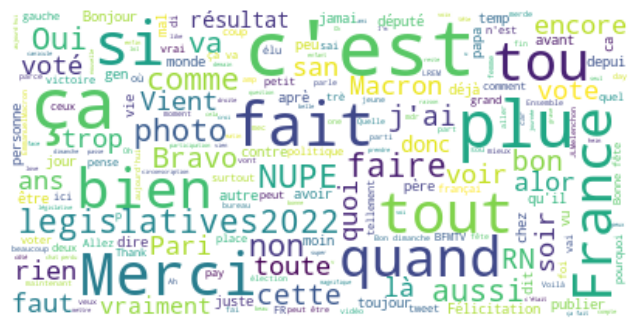

In [41]:
c = wordcloud.WordCloud(background_color='white',
                          stopwords=Stopwords,
                          max_words=200,
                          max_font_size=50,
                          random_state=42)
c.generate(flat_list1)
plt.figure(figsize=(8,6),dpi=100)
plt.imshow(c,interpolation='bilinear')
plt.axis('off')
plt.show()

In [43]:
word_list2 = df[(df['country_code'] == 'TR') & (df['twit_created_date'] == '2022-06-12')]['twit_text'].to_list()
flat_list2 = ' '.join(word for word in word_list2)

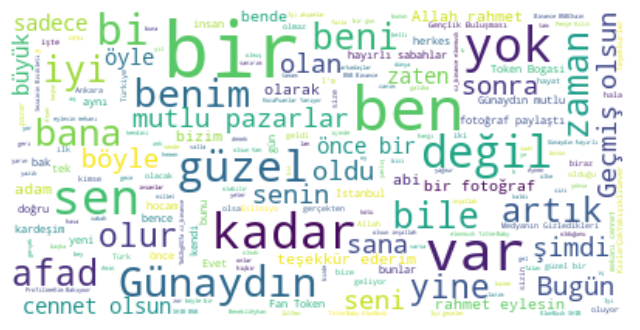

In [44]:
c = wordcloud.WordCloud(background_color='white',
                          stopwords=Stopwords,
                          max_words=200,
                          max_font_size=50,
                          random_state=42)
c.generate(flat_list2)
plt.figure(figsize=(8,6),dpi=100)
plt.imshow(c,interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
word_list3 = df[(df['country_code'] == 'ES') & (df['twit_created_date'] == '2022-06-19')]['twit_text'].to_list()
flat_list3 = ' '.join(word for word in word_list3)

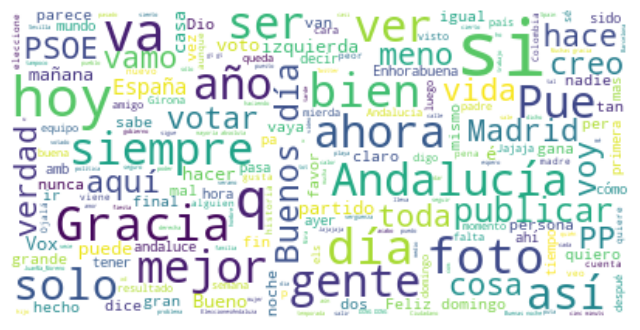

In [47]:
c = wordcloud.WordCloud(background_color='white',
                          stopwords=Stopwords,
                          max_words=200,
                          max_font_size=50,
                          random_state=42)
c.generate(flat_list3)
plt.figure(figsize=(8,6),dpi=100)
plt.imshow(c,interpolation='bilinear')
plt.axis('off')
plt.show()

In [48]:
word_freq = WordCloud.process_text(wordcloud,flat_list3)
freq = pd.Series(word_freq).sort_values(ascending=False)[:20]
freq

AttributeError: module 'wordcloud' has no attribute 'min_word_length'

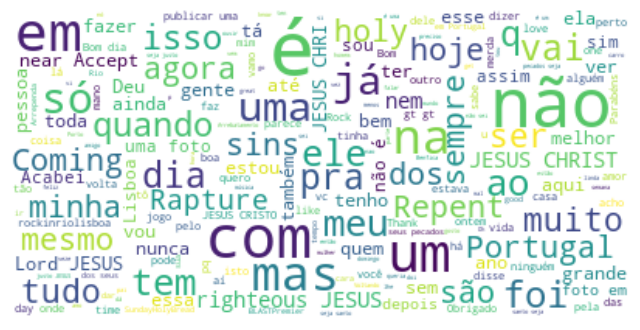

In [53]:
word_list5 = df[(df['country_code'] == 'PT') & (df['twit_created_date'] == '2022-06-19')]['twit_text'].to_list()
flat_list5 = ' '.join(word for word in word_list5)
c = wordcloud.WordCloud(background_color='white',
                          stopwords=Stopwords,
                          max_words=200,
                          max_font_size=50,
                          random_state=42)
c.generate(flat_list5)
plt.figure(figsize=(8,6),dpi=100)
plt.imshow(c,interpolation='bilinear')
plt.axis('off')
plt.show()

In [57]:
word_freq = wordcloud.WordCloud.process_text(wordcloud,flat_list5)
freq = pd.Series(word_freq).sort_values(ascending=False)[:20]
freq

TypeError: process_text() takes 2 positional arguments but 3 were given

In [ ]:
# the frequency of the text for UK
word_freq = WordCloud.process_text(wordcloud,flat_list) 
nums = [(word_freq[w]) for w in sorted(word_freq)]

plt.hist(nums, 20, log=True,label='UK')
plt.legend()
plt.show()

UK NEWS 6JUNE 2022
https://www.gov.uk/government/news/pm-meeting-with-prime-minister-of-estonia-6-june-2022

# NEWS FOR UNITED KINGDOM FOR 6TH JUNE 2022

https://www.gov.uk/government/news/pm-meeting-with-prime-minister-of-estonia-6-june-2022

https://www.theguardian.com/politics/2022/jun/06/boris-johnson-wins-no-confidence-vote-despite-unexpectedly-large-rebellion

# NEWS FOR ITALY FOR 22ND JUNE 2022

https://www.independent.co.uk/news/world/americas/us-politics/luigi-di-maio-ap-italy-ukraine-rome-b2106663.html

https://twitter.com/search?q=Di%20santita%20lang%3Ait%20since%3A2022-06-22&src=typed_query

# NEWS FOR IRELAND FOR 26TH JUNE 2022

https://www.bbc.co.uk/sport/football/61778453

https://twitter.com/search?q=Dublin%20since%3A2022-06-22&src=typed_query

https://www.bing.com/videos/search?q=love+island+first+look+jacques&docid=608028320068415005&mid=B92C022EC5E325AE60A6B92C022EC5E325AE60A6&view=detail&FORM=VIRE